<a href="https://colab.research.google.com/github/jsblandon/sdm_py/blob/main/raster_aligning_resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Instalación de paquetes**

In [ ]:
%%capture

# Retrieving tile maps from the internet
!pip3 install contextily

# geospatial xarray extension powered by rasterio
!pip install rioxarray

# Utilities for applying scikit-learn to spatial datasets
!pip install pyimpute

# Plot data on map projections with matplotlib
!python -m pip install basemap

## **Carga de Librerías**

In [ ]:
import contextily as cx            # basemap tiles
import matplotlib.pyplot as plt
import numpy as np                 # array managing
import pandas as pd                # structured data managing
import xarray as xr                # labelled multi-dimensional arrays
import rasterio as rio             # rastewr managing
import rioxarray as rxr            # raster managing
import seaborn as sns              # plots
from rasterio.enums import Resampling
from rasterio.plot import show     # plotting from rasterio
from warnings import simplefilter  # get rid off warnings

In [ ]:
# Plot settings
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

sns.set_style('whitegrid')
simplefilter("ignore")

## **Carga de Funciones**

In [ ]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    f""" Funcion para guardar figuras eficientemente

        Recibe
        ------
        fig_id : string
            Identificador de la figura

        Devuelve
        --------
        Figura almacenada en el directorio de trabajo

        Fuente: Géron, A. (2022). Hands-on machine learning with Scikit-Learn,
        Keras, and TensorFlow. " O'Reilly Media, Inc.".

    """
    path =  f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution,bbox_inches="tight",transparent=True)

## **Carga de Datos**

In [ ]:
# Ruta de los datos
ruta_var_exogenas = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/"

# WorldClim Elevation
raster_a_resamplear = rxr.open_rasterio(ruta_var_exogenas + "Elevation_Output_ris/elevation_1.tif", masked = True).squeeze()

# MapBiomas
raster_referencia = rxr.open_rasterio(ruta_var_exogenas + "MapBiomas_Output_ris/mapbiomas_ris_2014.tif", masked = True).squeeze()

## **Código Principal**

In [ ]:
# Se calculan los dos parámetros de resolución de la imagen a partir de la que
# se usará de referencia
new_width = raster_referencia.rio.width
new_height = raster_referencia.rio.height

# Se resampleao el raster a partir de la nueva resolucion. Como se quiere mejorar
# la resolución espacial se aplicará up-sampling:
raster_resampleado = raster_a_resamplear.rio.reproject(raster_a_resamplear.rio.crs, shape=(int(new_height), int(new_width)), resampling=Resampling.cubic_spline)

In [ ]:
# Resolución espacial
original_resolution = raster_a_resamplear.rio.resolution()
original_resolution_us = raster_resampleado.rio.resolution()
print(f"Resolución espacial: \n Imagen Original: {original_resolution}\n Imagen Resampleada: {original_resolution_us}")

# Resolución de la imagen
original_shape = raster_a_resamplear.shape
resampled_shape = raster_resampleado.shape
print(f"\nDimensiones de la imagen:\n Original: {original_shape}\n Resampleada: {resampled_shape}")

Resolución espacial: 
 Imagen Original: (0.041666666666666914, -0.041666666666666664)
 Imagen Resampleada: (0.0008051529790660179, -0.0008191837950551082)

Dimensiones de la imagen:
 Original: (22, 20)
 Resampleada: (1119, 1035)


In [ ]:
# Se exporta el raster
raster_resampleado.rio.to_raster("/content/raster_prueba.tif")

In [ ]:
# Se reabre el raster exportado para verificación
reload_raster = rxr.open_rasterio("/content/raster_prueba.tif", masked=True).squeeze()
reload_raster

<xarray.DataArray (y: 1119, x: 1035)> Size: 5MB
[1158165 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 8kB -76.21 -76.21 -76.21 ... -75.38 -75.38 -75.38
  * y            (y) float64 9kB 5.583 5.582 5.581 5.58 ... 4.669 4.668 4.667
    spatial_ref  int64 8B 0
Attributes:
    STATISTICS_MAXIMUM:  7412
    STATISTICS_MEAN:     1.#SNAN
    STATISTICS_MINIMUM:  -415
    STATISTICS_STDDEV:   1.#SNAN
    AREA_OR_POINT:       Area
    scale_factor:        1.0
    add_offset:          0.0

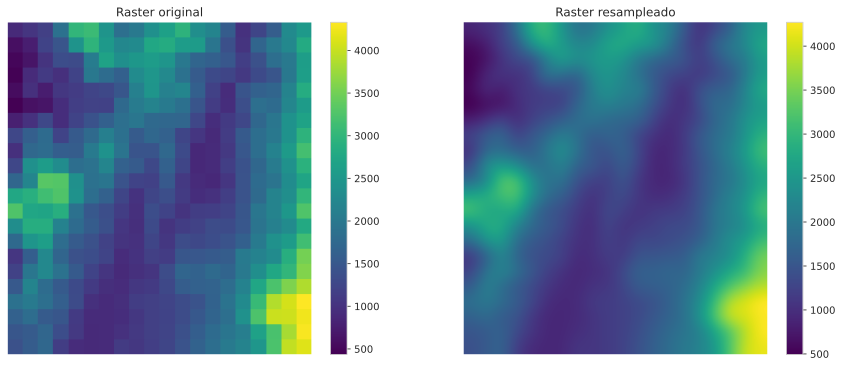

In [ ]:
# Grafica
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Se grafican los rasters
raster_a_resamplear.plot.imshow(ax=axes[0])
reload_raster.plot.imshow( ax=axes[1])

# Titulos
axes[0].set_title('Raster original')
axes[1].set_title('Raster resampleado')

# Se eliminan detalles innecesarios
for ax in axes[:]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

# save_fig("lulc_years_acegua_map",fig_extension="png")

plt.show()